<a href="https://colab.research.google.com/github/yumnaehab-tech/data-science-projects/blob/main/Customer_Segmentation_KMeans_YumnaEhab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#  Project: Customer Segmentation using K-Means Clustering
#  Author: Yumna Ehab



In [4]:

from google.colab import files

print("...")
uploaded = files.upload()


...


Saving mall_customers.zip to mall_customers.zip


In [5]:
import zipfile
import os

zip_filename = 'mall_customers.zip'

if os.path.exists(zip_filename):
    print("File found! Extracting contents...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall()
    print(" Extraction completed successfully!")
else:
    print(" File not found. Please check the file name.")


File found! Extracting contents...
 Extraction completed successfully!


In [6]:
print(" Files available after extraction:")
os.listdir()


 Files available after extraction:


['.config',
 'Mall_Customers.csv',
 '.ipynb_checkpoints',
 'mall_customers.zip',
 'sample_data']

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

print("Data loaded successfully!")

# Display the first few rows to understand the structure
print("\n Here's a quick look at the data:")
print(data.head())

# Show basic info about the dataset
print("\n Dataset Info:")
print(data.info())

# Check for missing values
print("\n Checking for missing values:")
print(data.isnull().sum())


Data loaded successfully!

 Here's a quick look at the data:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
m

/tmp/ipython-input-4182809587.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=data, palette='pastel')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


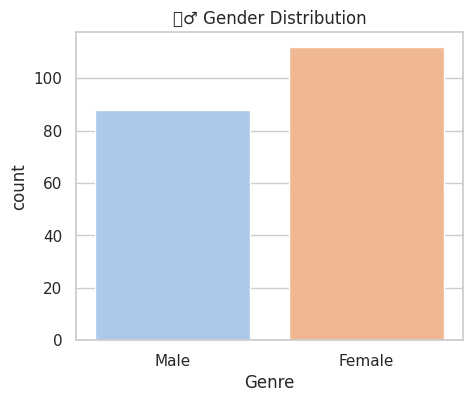

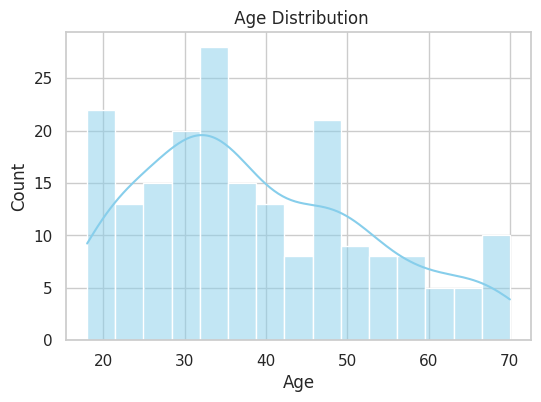

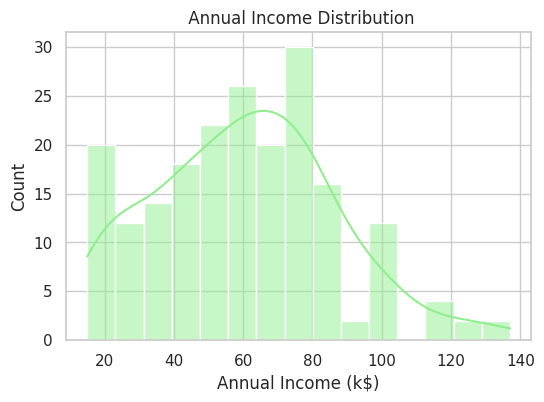

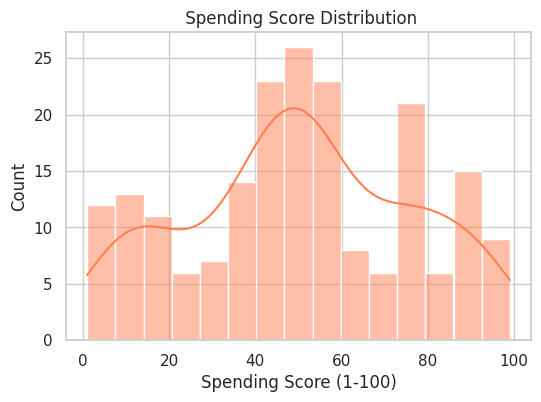

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Gender Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Genre', data=data, palette='pastel')
plt.title("🧍‍♂️ Gender Distribution")
plt.show()

# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title(" Age Distribution")
plt.show()

# Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='lightgreen')
plt.title(" Annual Income Distribution")
plt.show()

# Spending Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, color='coral')
plt.title(" Spending Score Distribution")
plt.show()


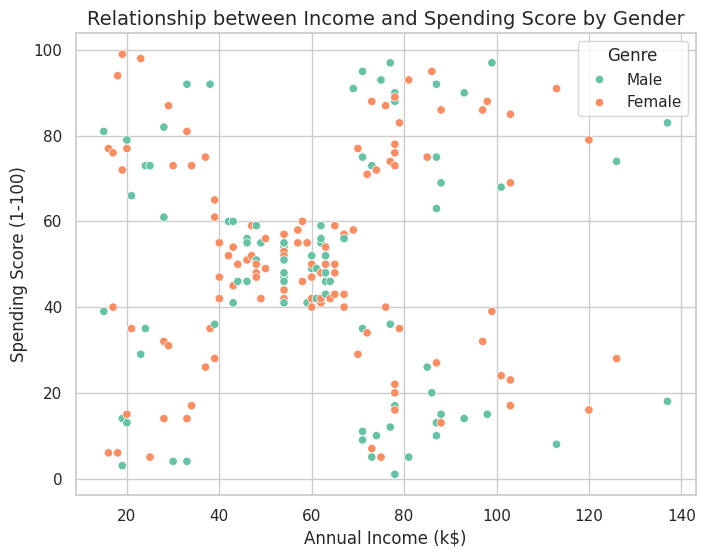

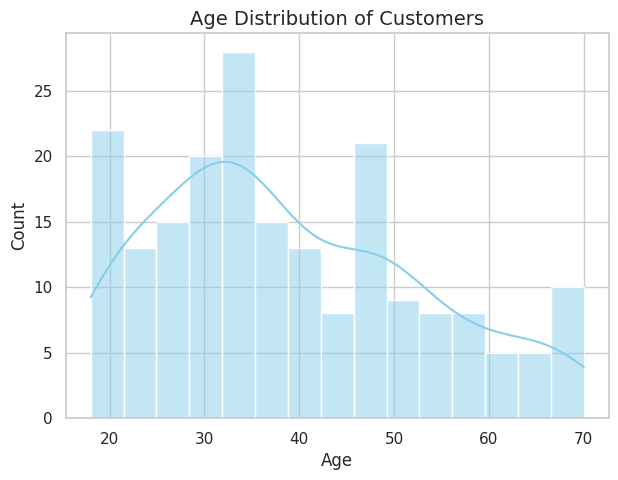

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between Annual Income and Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=data, palette='Set2')
plt.title("Relationship between Income and Spending Score by Gender", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Age distribution
plt.figure(figsize=(7,5))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Customers", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


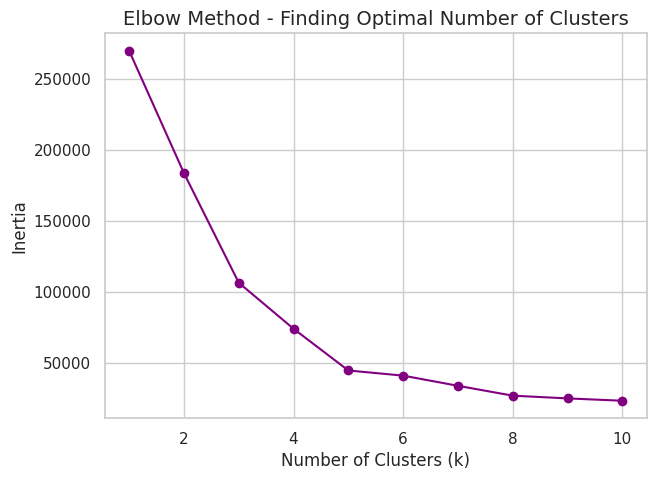

In [10]:
from sklearn.cluster import KMeans

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11), inertia, marker='o', color='purple')
plt.title("Elbow Method - Finding Optimal Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


 Applying K-Means with k = 5 ...
 Clustering complete! Let's visualize the results.



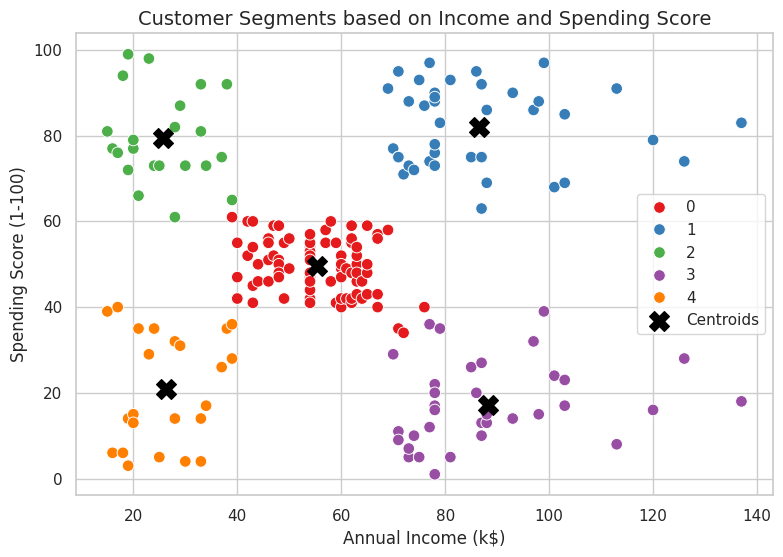

In [11]:
#  Step 5: Apply K-Means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# We’ll use 5 clusters based on the Elbow Method
print(" Applying K-Means with k = 5 ...")

kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

print(" Clustering complete! Let's visualize the results.\n")

#  Visualizing the clusters
plt.figure(figsize=(9,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=data,
    s=70
)

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("Customer Segments based on Income and Spending Score", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [12]:
#  Step 6: Analyze each customer cluster
print("Let's understand what each cluster represents:\n")

cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


Let's understand what each cluster represents:

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


# 🛍️ Customer Segmentation using K-Means Clustering

This project aims to understand different customer groups based on their shopping behavior.  
By analyzing their **Age**, **Annual Income**, and **Spending Score**, we can help marketing teams target the right audience more effectively.

---

## 📊 Dataset
The dataset used is **Mall Customers Dataset**.  
It contains 200 entries with the following columns:
- `CustomerID` — Unique ID for each customer  
- `Genre` — Gender (Male/Female)  
- `Age` — Customer age  
- `Annual Income (k$)` — Yearly income in thousands  
- `Spending Score (1-100)` — Score assigned by the mall based on customer behavior  

---

## ⚙️ Steps in the Project
1. **Data Loading & Cleaning** — Checked for missing values and dataset info.  
2. **Exploratory Data Analysis (EDA)** — Visualized distributions and relationships.  
3. **Finding Optimal Clusters** — Used the Elbow Method to decide the best number of clusters.  
4. **Modeling with K-Means** — Grouped customers into 5 main clusters.  
5. **Visualization** — Created 2D and 3D plots to explore how clusters differ.  

---

## 💡 Key Insights
- **Cluster 1**: High income & high spending — potential premium customers.  
- **Cluster 2**: Low income but high spending — impulsive buyers.  
- **Cluster 3**: Moderate income & average spending — regular customers.  
- **Cluster 4**: High income but low spending — need better engagement strategies.  
- **Cluster 5**: Low income & low spending — least profitable segment.

---

## 🧰 Tools Used
- Python  
- Pandas  
- Matplotlib & Seaborn  
- Scikit-learn  

---

## 👩‍💻 Author
**Yumna Ehab**  
[GitHub Profile](https://github.com/yumnaehab-tech)

---

## 🚀 Future Improvements
- Try DBSCAN or Hierarchical Clustering for comparison.  
- Add dashboard visualization (e.g., Plotly or Power BI).  
